In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart_disease.xlsx to heart_disease.xlsx


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

In [3]:
Heart_disease = pd.read_excel("heart_disease.xlsx",sheet_name='Heart_disease')
Heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
Heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
print(Heart_disease.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [7]:
Heart_disease["num"].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [8]:
Heart_disease.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
df = Heart_disease.dropna(axis=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


<Axes: >

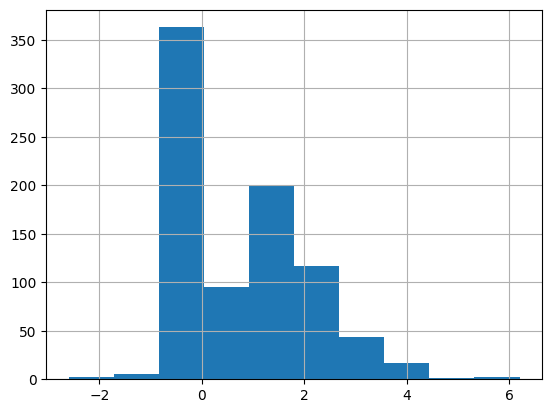

In [10]:
df["oldpeak"].hist()

In [11]:
df.shape

(846, 13)

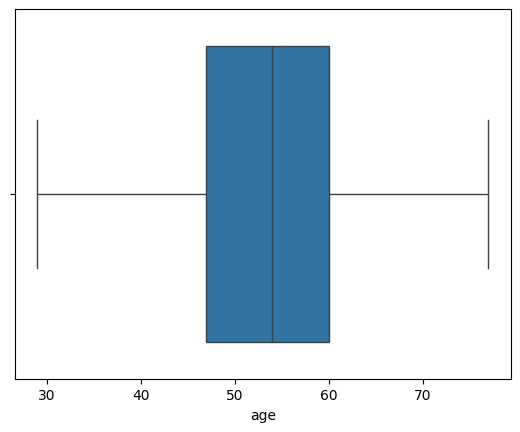

In [12]:
sns.boxplot(x=df['age'])
plt.show()

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB


In [16]:
df[["age","trestbps","chol","thalch","oldpeak",'num']].corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.244301,-0.107471,-0.345960,0.242662,0.331399
trestbps,0.244301,1.000000,0.100912,-0.109390,0.167131,0.126158
chol,-0.107471,0.100912,1.000000,0.224456,0.029898,-0.256191
thalch,-0.345960,-0.109390,0.224456,1.000000,-0.139598,-0.350331
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.331399,0.126158,-0.256191,-0.350331,0.437577,1.000000


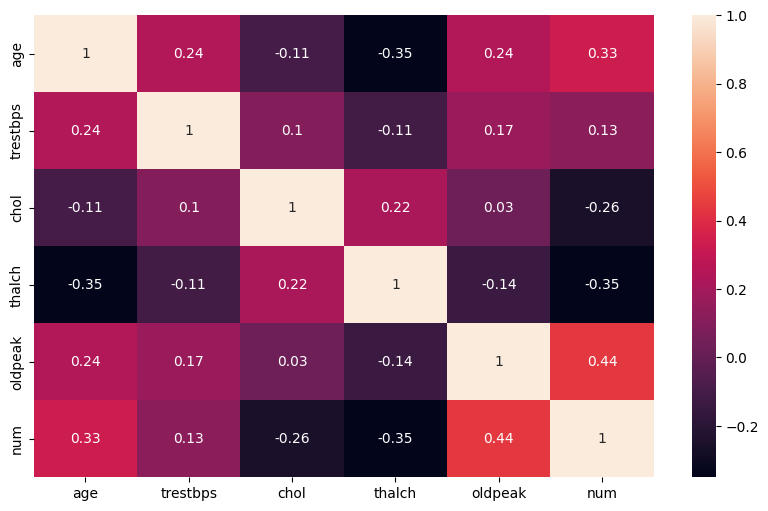

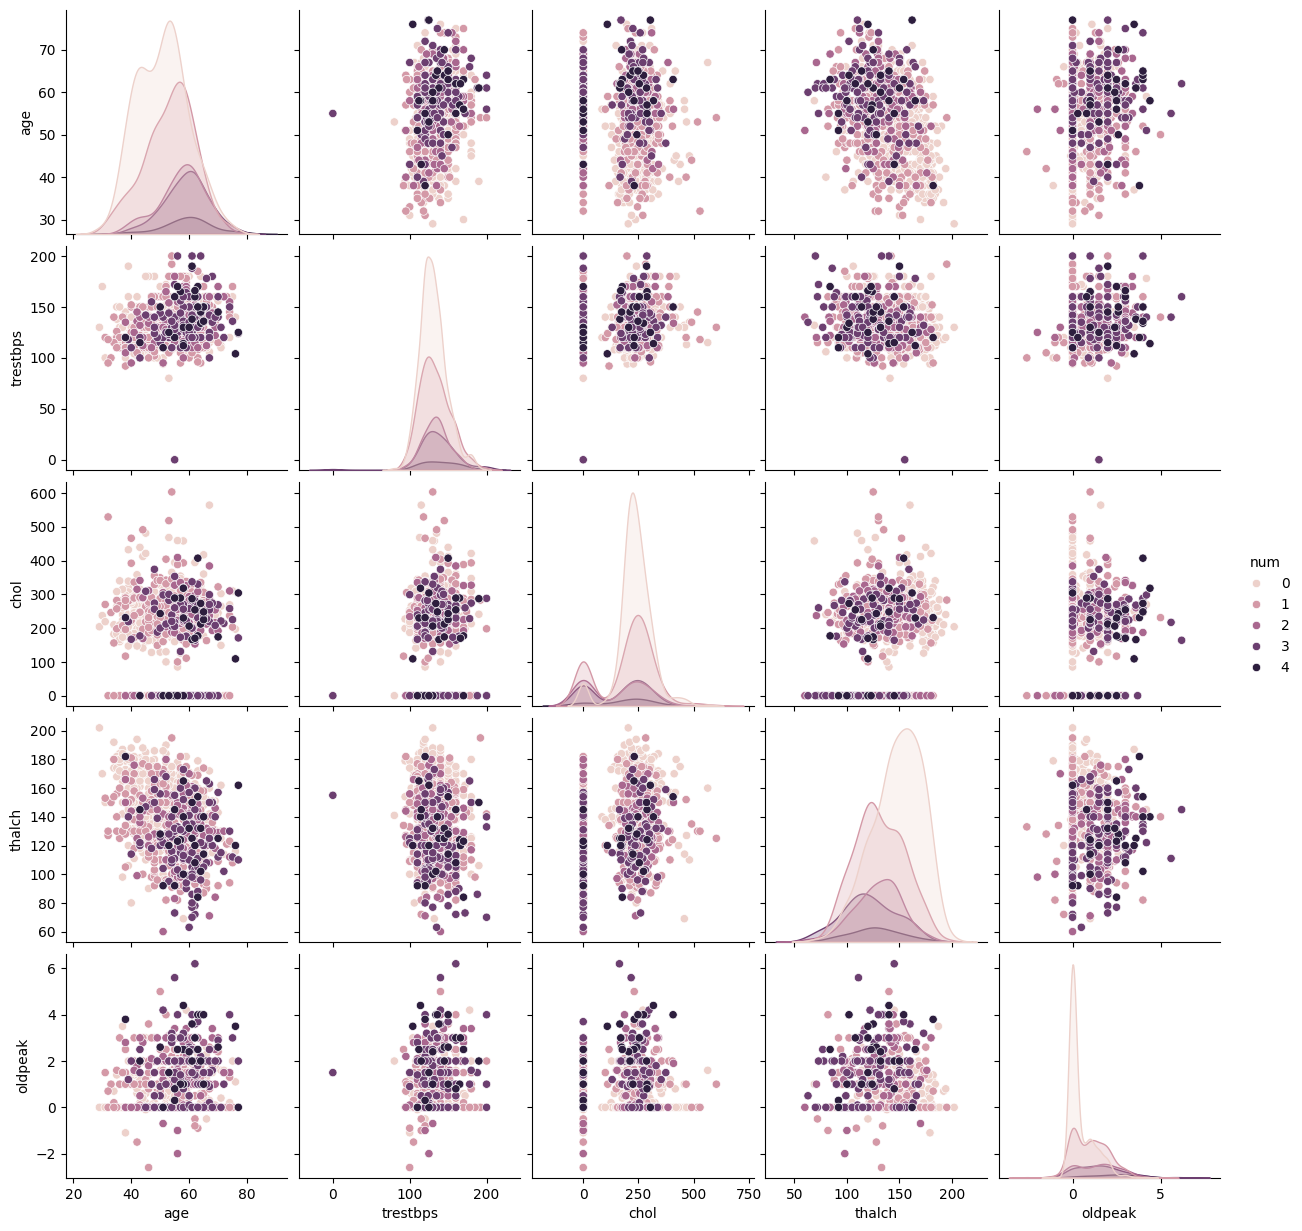

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df[["age","trestbps","chol","thalch","oldpeak",'num']].corr(),annot=True)
plt.show()
sns.pairplot(data=df[["age","trestbps","chol","thalch","oldpeak",'num']], hue = 'num')

In [21]:
df["sex"].value_counts()

,count
sex,
Male,657
Female,189


In [22]:
df["cp"].value_counts()

,count
cp,
asymptomatic,464
non-anginal,184
atypical angina,158
typical angina,40


In [23]:
df["fbs"].value_counts()

,count
fbs,
False,688
True,158


In [24]:
df["restecg"].value_counts()

,count
restecg,
normal,520
lv hypertrophy,180
st-t abnormality,146


In [25]:
df["exang"].value_counts()

,count
exang,
False,512
True,333
FALSE,1


In [26]:
df.shape

(846, 13)

In [27]:
df["exang"].value_counts()

,count
exang,
False,512
True,333
FALSE,1


In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [29]:
df["slope"].value_counts()

,count
slope,
flat,425
upsloping,276
downsloping,145


In [30]:
df["thal"].value_counts()

,count
thal,
normal,364
reversable defect,324
fixed defect,158


In [31]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

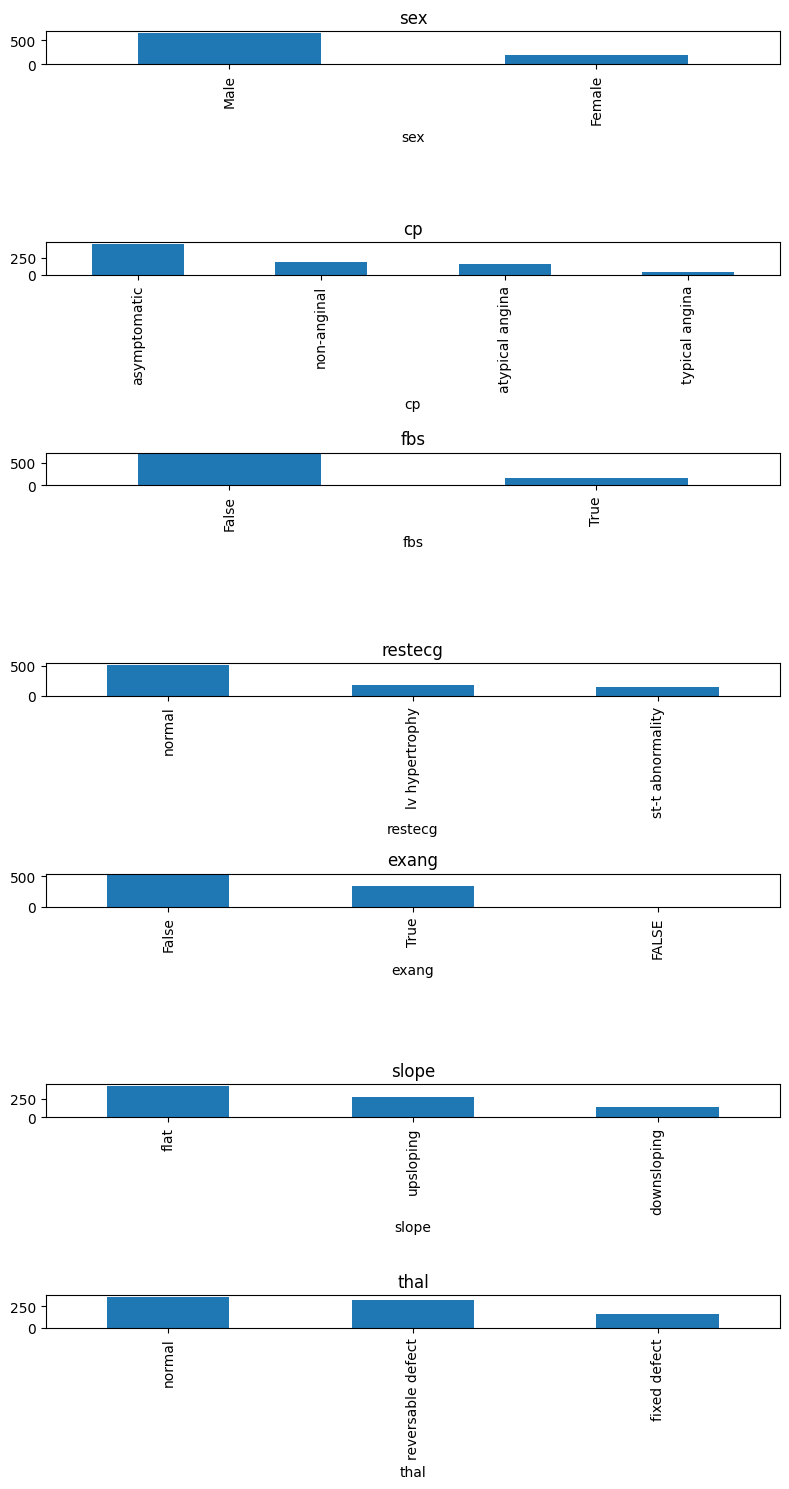

In [32]:
fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(8, 15))

# Plot bar plots for each categorical variable
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [34]:
numerical_features = ['age', 'trestbps','chol','thalch','oldpeak']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [38]:
df.shape

(846, 13)

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert 'exang' column to string type before applying Label Encoding
df['exang'] = df['exang'].astype(str)

# Apply Label Encoding
LE = LabelEncoder()
df["sex"] = LE.fit_transform(df["sex"])
df["cp"] = LE.fit_transform(df["cp"])
df["fbs"] = LE.fit_transform(df["fbs"])
df["restecg"] = LE.fit_transform(df["restecg"])
df["exang"] = LE.fit_transform(df["exang"]) # Now this line should work without error
df["slope"] = LE.fit_transform(df["slope"])
df["thal"] = LE.fit_transform(df["thal"])

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.052849,1,3,0.652591,0.271960,1,0,0.501387,1,1.288612,0,0,0
1,-1.366364,1,1,0.132633,0.003114,0,1,-0.201922,1,-0.815249,1,0,0
2,0.393064,1,0,0.392612,-0.095463,0,1,0.423242,1,-0.449360,1,0,0
3,-0.156758,1,3,-0.751298,-0.149232,0,0,2.064297,1,-0.815249,1,0,0
4,0.393064,1,0,-1.167265,-0.014809,0,1,-0.436358,2,0.556834,1,0,0


In [41]:
x = df[["age","sex","cp","trestbps","chol","fbs","restecg","thalch","exang","oldpeak","slope","thal"]]
y = df["num"]

In [42]:
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.052849,1,3,0.652591,0.271960,1,0,0.501387,1,1.288612,0,0
1,-1.366364,1,1,0.132633,0.003114,0,1,-0.201922,1,-0.815249,1,0
2,0.393064,1,0,0.392612,-0.095463,0,1,0.423242,1,-0.449360,1,0
3,-0.156758,1,3,-0.751298,-0.149232,0,0,2.064297,1,-0.815249,1,0
4,0.393064,1,0,-1.167265,-0.014809,0,1,-0.436358,2,0.556834,1,0


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [49]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

ac1 = accuracy_score(y_train,y_pred_train)
print("Training accuracy:", round(ac1, 2)) # Use the round() function instead of the method

ac2 = accuracy_score(y_test,y_pred_test)
print("Test accuracy:", round(ac2, 2)) # Use the round() function instead of the methodz

Training accuracy: 1.0
Test accuracy: 0.52


In [52]:
# prompt: tell me some other hyper paramters which can be improves the model performance for the model above dt

# - `max_depth`: This parameter controls the maximum depth of the decision tree. A larger value allows the tree to grow deeper, potentially capturing more complex relationships in the data, but also increasing the risk of overfitting.
# - `min_samples_split`: This parameter controls the minimum number of samples required to split a node. A larger value makes the tree more conservative, reducing the risk of overfitting but potentially missing out on some important relationships in the data.
# - `min_samples_leaf`: This parameter controls the minimum number of samples required in a leaf node. A larger value makes the tree more conservative, reducing the risk of overfitting but potentially leading to underfitting.
# - `max_features`: This parameter controls the maximum number of features considered when splitting a node. A smaller value reduces the risk of overfitting by making the tree more focused on the most important features.
# - `criterion`: This parameter controls the function used to evaluate the quality of a split. The most common options are "gini" and "entropy".
# - `splitter`: This parameter controls the strategy used to split a node. The most common options are "best" and "random".

In [54]:
# Change the min_samples_split parameter to 5
dt = DecisionTreeClassifier(min_samples_leaf=25,max_depth=10,max_features=13,criterion='gini',splitter='random')

# Fit the model
dt.fit(x_train, y_train)

# Predict on the training and test sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Evaluate the model's performance
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)

# Print the results
# Use the round() function to round the accuracy scores
print("Training accuracy:", round(ac1, 2))
print("Test accuracy:", round(ac2, 2))

Training accuracy: 0.6
Test accuracy: 0.51


In [56]:
# Create a new decision tree classifier with max_depth set to 5
dt = DecisionTreeClassifier(max_depth=6)

# Fit the new decision tree classifier on the training data
dt.fit(x_train, y_train)

# Predict the class labels for the training and test data
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Calculate the accuracy score for the training and test data
ac1 = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", round(ac1, 2)) # Use the round() function to round the float

ac2 = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", round(ac2, 2)) # Use the round() function to round the float

Training accuracy: 0.73
Test accuracy: 0.52


In [58]:
# Calculate the accuracy score for the training and test data
ac1 = accuracy_score(y_train, y_pred_train)
print("Training accuracy:", round(ac1, 2))

ac2 = accuracy_score(y_test, y_pred_test)
print("Test accuracy:", round(ac2, 2))

Training accuracy: 0.59
Test accuracy: 0.56


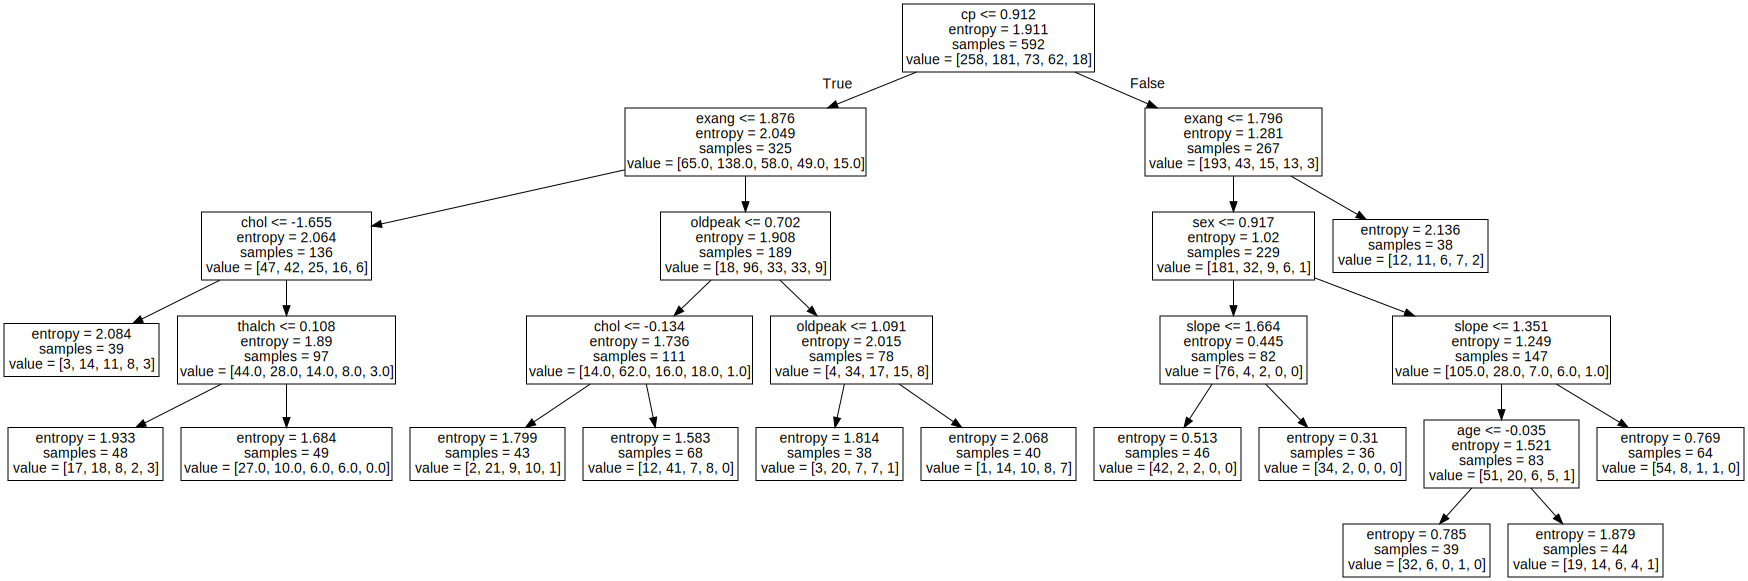

In [59]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_best, out_file=None, feature_names=x.columns)
graph = graphviz.Source(dot_data)
graph

In [60]:
# Calculate precision
precision = precision_score(y_train, y_pred_train, average='macro')
print("Precision:", precision)

precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

Precision: 0.23199412951751971
Precision: 0.21582878302893366


In [61]:
# Calculate recall
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

Recall: 0.3119790997473125
Recall: 0.2871739130434783


In [62]:
# Calculate F1-score
f1 = f1_score(y_train, y_pred_train, average='macro')
print("F1-score:", f1)

f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

F1-score: 0.26534511547053574
F1-score: 0.24489916214054147


In [63]:
from sklearn.metrics import roc_curve,roc_auc_score

df["Y_proba"] = dt_best.predict_proba(x)[:,1]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,Y_proba
0,1.052849,1,3,0.652591,0.271960,1,0,0.501387,1,1.288612,0,0,0,0.318182
1,-1.366364,1,1,0.132633,0.003114,0,1,-0.201922,1,-0.815249,1,0,0,0.153846
2,0.393064,1,0,0.392612,-0.095463,0,1,0.423242,1,-0.449360,1,0,0,0.204082
3,-0.156758,1,3,-0.751298,-0.149232,0,0,2.064297,1,-0.815249,1,0,0,0.153846
4,0.393064,1,0,-1.167265,-0.014809,0,1,-0.436358,2,0.556834,1,0,0,0.602941


In [64]:
# prompt: print the number of nodes and depth of tree

print("The number of nodes in the tree is:", dt_best.tree_.node_count)
print("The depth of the tree is:", dt_best.tree_.max_depth)

The number of nodes in the tree is: 25
The depth of the tree is: 5


In [65]:
# bagging classifer
# cross validation method
from sklearn.ensemble import BaggingClassifier
dt_model = BaggingClassifier(max_features=0.7,max_samples=0.6)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.92
Cross validation Test score:  0.55


In [66]:
# random forest classifer
# cross validation method
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier(max_features=0.7,max_samples=0.6)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.98
Cross validation Test score:  0.57


In [ ]:
# adaboost classifer
# cross validation method
from sklearn.ensemble import AdaBoostClassifier
dt_model = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

In [ ]:
# prompt: fit the above data using xgb classifier and give the best test accuracy by trying with different parameters

# xgboost classifier
# cross validation method
from xgboost import XGBClassifier
dt_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500,reg_lambda=1,gamma=10)


training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

In [ ]:
# prompt: with out using cross validation tune the parameters for XGB classifier such as reg_lambda, learning_rate, gamma

dt_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=500,reg_lambda=1,gamma=10)
dt_model.fit(x_train,y_train)
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)

ac1 = accuracy_score(y_train,y_pred_train)
print("Training accuracy:", ac1.round(2))

ac2 = accuracy_score(y_test,y_pred_test)
print("Test accuracy:", ac2.round(2))

'''
# Calculate precision
precision = precision_score(y_train, y_pred_train, average='macro')
print("Precision:", precision)

precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)
# Calculate F1-score
f1 = f1_score(y_train, y_pred_train, average='macro')
print("F1-score:", f1)

f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)
'''

In [ ]:
# prompt: change the parameters using grid search cv and fit the model once again give the best accracy

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 150, 200, 500],
    'reg_lambda': [0.1, 1, 10],
    'gamma': [1, 10]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = XGBClassifier(**best_params)
best_model.fit(x_train, y_train)

y_pred_test = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Test accuracy with best parameters:", accuracy.round(2))